In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Oppgave 1

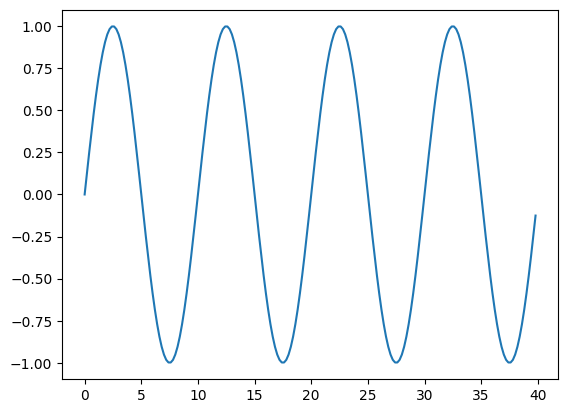

In [ ]:
N = 900
delta_t = 0.0002
A = 1
f = 100

t = np.arange(N)*delta_t
x = np.sin(2*np.pi*f*t)

k = np.arange(200)
plt.plot(t[k]*1e3, x[k])

fs = 5000
Nyquist = 2500

## Oppgave 2
### (a)

In [ ]:
N_FFT = 1024
f_s = 5000

delta_f = f_s/N_FFT
print(delta_f)

4.8828125


Delta f er derfor ca 4.88Hz

### (b)

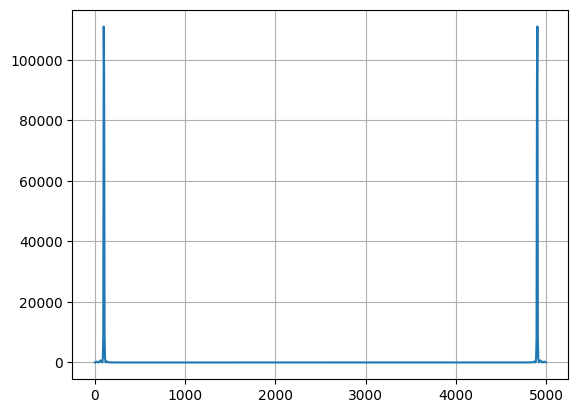

In [ ]:
X = np.fft.fft(x, N_FFT)
S_xx = np.abs(X)**2

f = np.arange(N_FFT) * delta_f

plt.plot(f, S_xx)
plt.grid(True)

Speilfrekvensen er 5000Hz-100Hz=4900Hz

### (c)

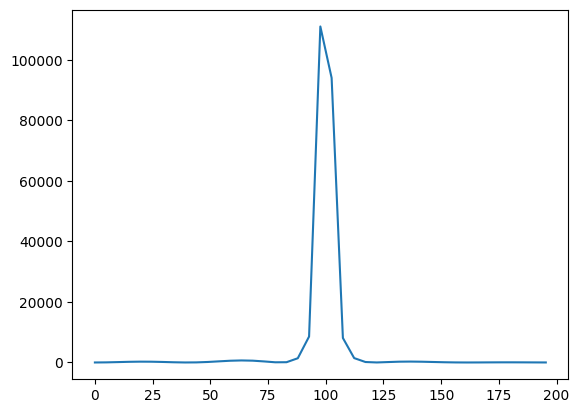

In [ ]:
mask = (f >= 0) & (f <= 200)
plt.plot(f[mask], S_xx[mask])

Den er litt under 100Hz

### (d)

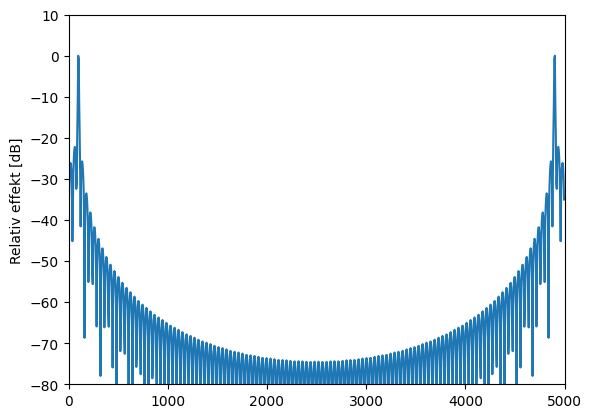

In [ ]:
X_mag = np.abs(X)
X_mag_db = 20 * np.log10(X_mag)

X_mag_db = X_mag_db - np.max(X_mag_db)

plt.figure()
plt.plot(f, X_mag_db)
plt.ylabel("Relativ effekt [dB]")
plt.ylim([-80, 10])
plt.xlim([0, f_s])
plt.show()

## Oppgave 3

### (a) og (b)

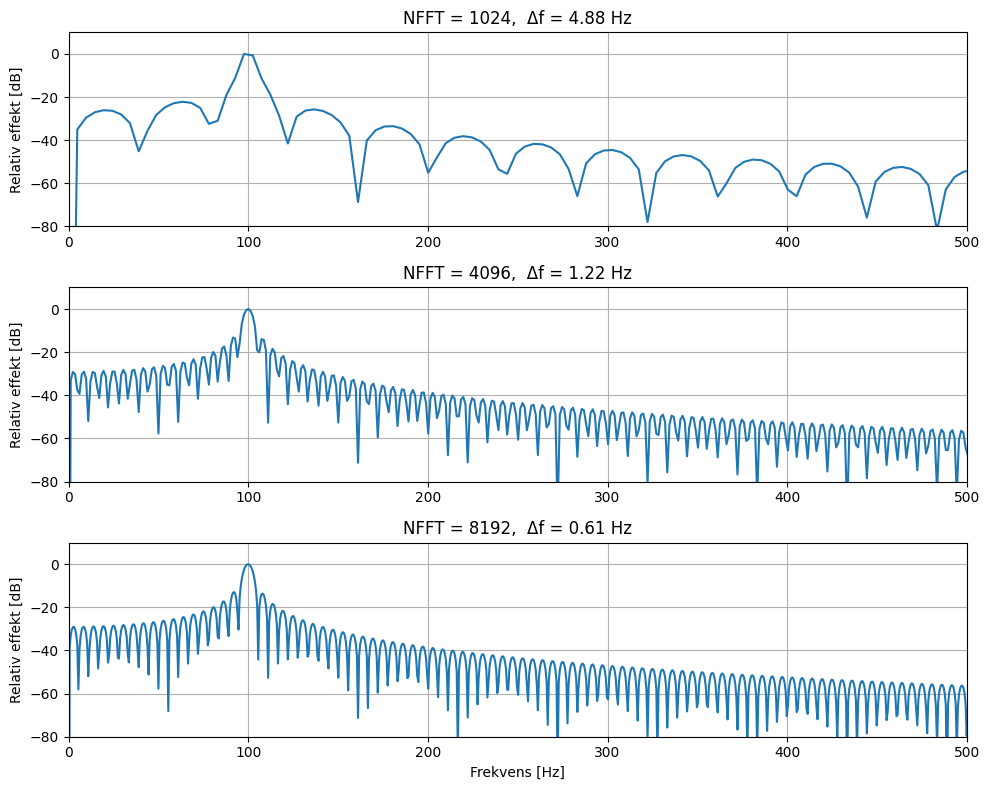

In [ ]:
A = 1.0
f0 = 100.0
dt = 0.2e-3
fs = 1/dt
N = 900

t = np.arange(N) * dt
x = A * np.sin(2*np.pi*f0*t)
               
NFFT1 = 1024
X1 = np.fft.fft(x, NFFT1)
f1 = np.arange(NFFT1) * fs / NFFT1

X1_db = 20*np.log10(np.abs(X1))
X1_db -= np.max(X1_db)

NFFT2 = 4096
X2 = np.fft.fft(x, NFFT2)
f2 = np.arange(NFFT2) * fs / NFFT2

X2_db = 20*np.log10(np.abs(X2))
X2_db -= np.max(X2_db)

NFFT3 = 8192
X3 = np.fft.fft(x, NFFT3)
f3 = np.arange(NFFT3) * fs / NFFT3

X3_db = 20*np.log10(np.abs(X3))
X3_db -= np.max(X3_db)

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(f1, X1_db)
plt.grid(True)
plt.title(f"NFFT = 1024,  Δf = {fs/NFFT1:.2f} Hz")
plt.ylabel("Relativ effekt [dB]")
plt.ylim([-80, 10])
plt.xlim([0, 500])

plt.subplot(3, 1, 2)
plt.plot(f2, X2_db)
plt.grid(True)
plt.title(f"NFFT = 4096,  Δf = {fs/NFFT2:.2f} Hz")
plt.ylabel("Relativ effekt [dB]")
plt.ylim([-80, 10])
plt.xlim([0, 500])

plt.subplot(3, 1, 3)
plt.plot(f3, X3_db)
plt.grid(True)
plt.title(f"NFFT = 8192,  Δf = {fs/NFFT3:.2f} Hz")
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Relativ effekt [dB]")
plt.ylim([-80, 10])
plt.xlim([0, 500])

plt.tight_layout()
plt.show()

## Oppgave 4

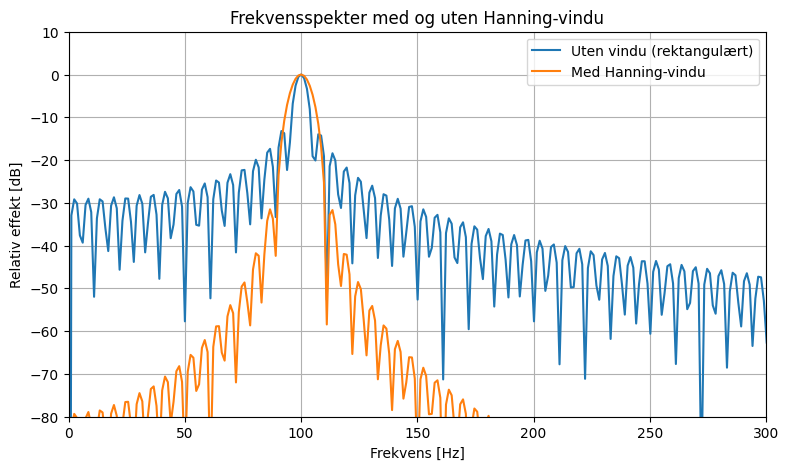

In [ ]:
A = 1.0
f0 = 100.0
dt = 0.2e-3
fs = 1/dt
N = 900
NFFT = 4096

t = np.arange(N) * dt
x = A * np.sin(2*np.pi*f0*t)

w = np.hanning(N)
x_win = x * w         

X = np.fft.fft(x, NFFT)
f = np.arange(NFFT) * fs / NFFT
X_db = 20*np.log10(np.abs(X))
X_db -= np.max(X_db)

Xw = np.fft.fft(x_win, NFFT)
Xw_db = 20*np.log10(np.abs(Xw))
Xw_db -= np.max(Xw_db)

plt.figure(figsize=(9, 5))
plt.plot(f, X_db, label="Uten vindu (rektangulært)")
plt.plot(f, Xw_db, label="Med Hanning-vindu")
plt.grid(True)
plt.xlim([0, 300])
plt.ylim([-80, 10])
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Relativ effekt [dB]")
plt.title("Frekvensspekter med og uten Hanning-vindu")
plt.legend()
plt.show()

## Oppgave 5

### (a)

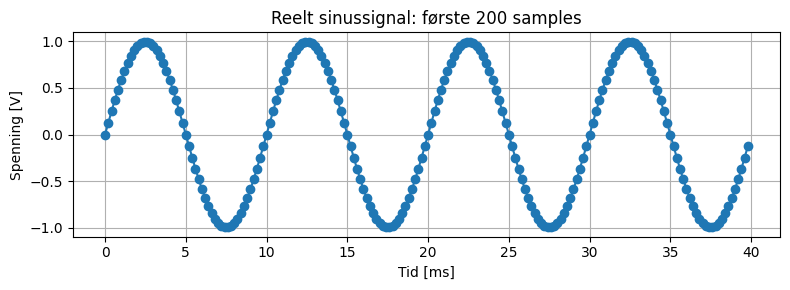

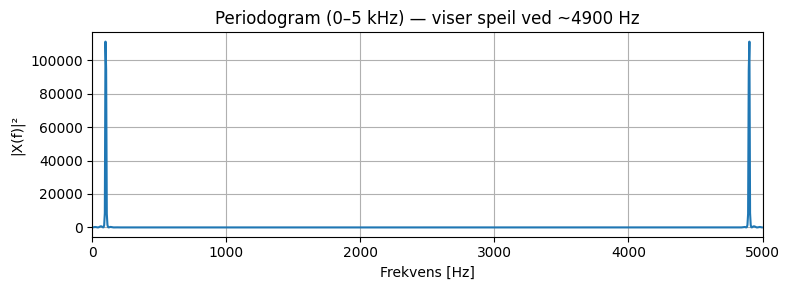

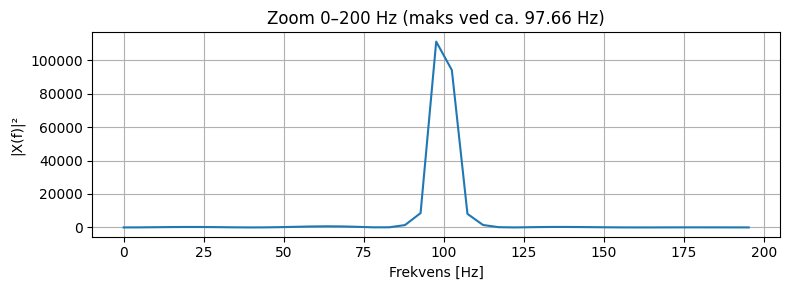

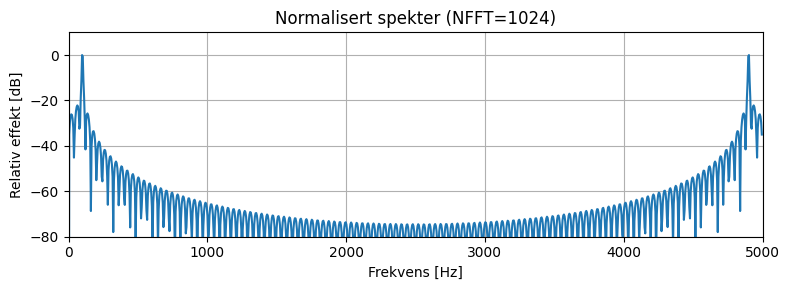

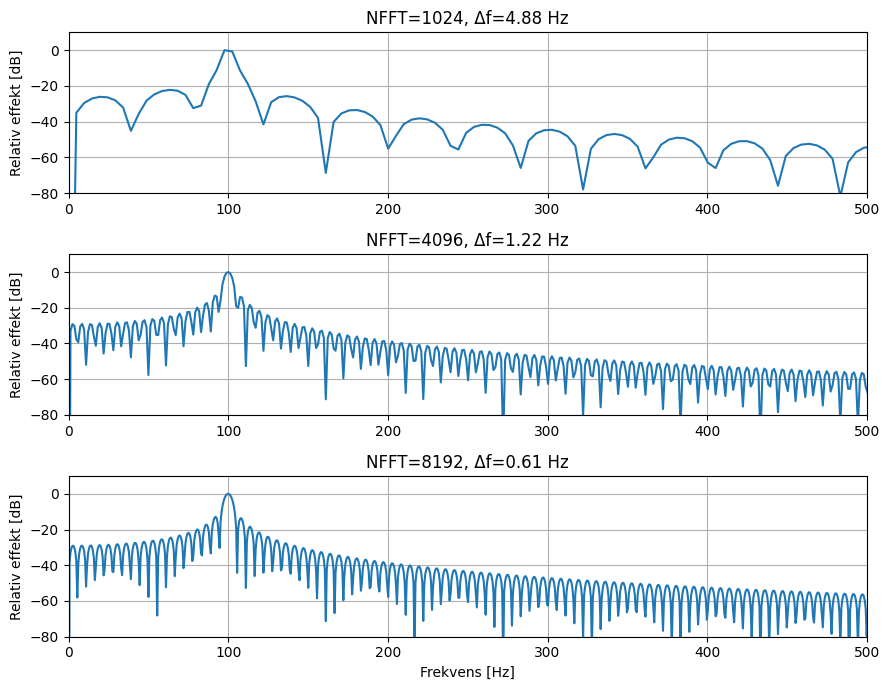

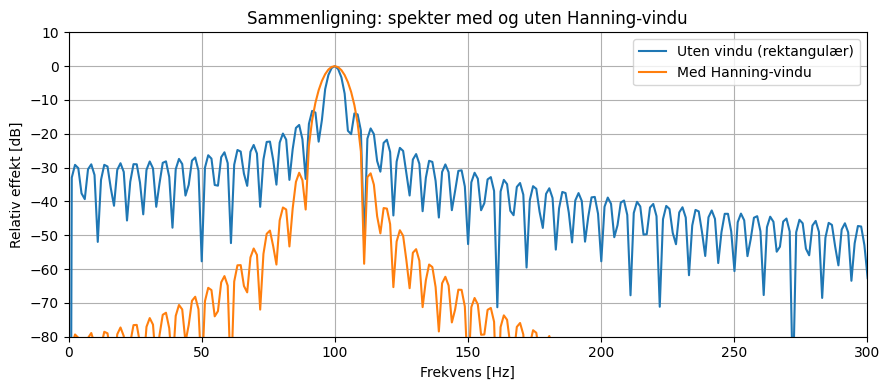

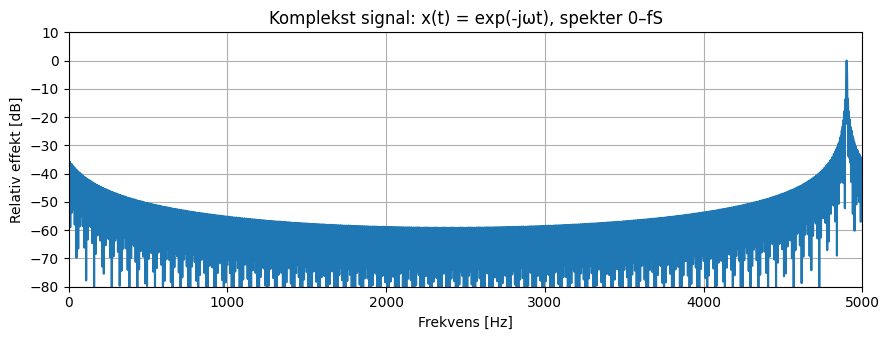

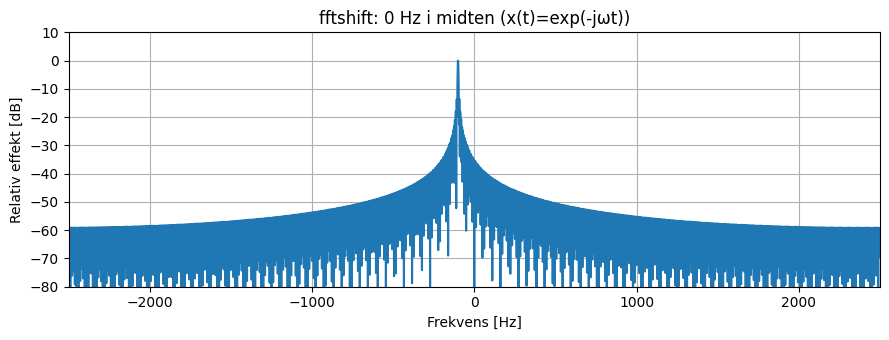

Sjekk f0=0: frekvens ved maks = 0.0 Hz (skal være ~0 Hz)


/var/folders/4p/djwlf8c57_l1km09n3_5vh2w0000gn/T/ipykernel_25671/3362824487.py:166: RuntimeWarning: divide by zero encountered in log10
  X_test_db = 20*np.log10(np.abs(X_test))


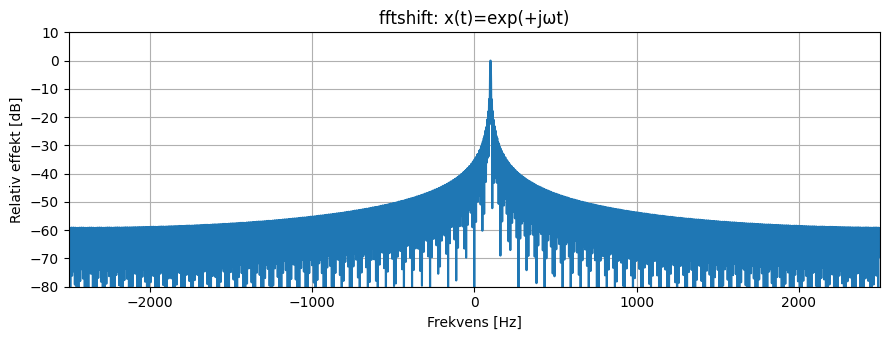

Maks for exp(+jωt) ligger ved ca. 100.09765625 Hz


In [ ]:


A = 1.0
f0 = 100.0
dt = 0.2e-3
fs = 1/dt                
N = 900

t = np.arange(N) * dt
x_real = A * np.sin(2*np.pi*f0*t)

NFFT_1024 = 1024
X_1024 = np.fft.fft(x_real, NFFT_1024)
f_1024 = np.arange(NFFT_1024) * fs / NFFT_1024
df_1024 = fs / NFFT_1024

Sxx_1024 = np.abs(X_1024)**2

mask_200 = f_1024 <= 200
kmax_200 = np.argmax(Sxx_1024[mask_200])
fmax_200 = f_1024[mask_200][kmax_200]

X_1024_db = 20*np.log10(np.abs(X_1024))
X_1024_db -= np.max(X_1024_db)

NFFT_4096 = 4096
X_4096 = np.fft.fft(x_real, NFFT_4096)
f_4096 = np.arange(NFFT_4096) * fs / NFFT_4096
X_4096_db = 20*np.log10(np.abs(X_4096))
X_4096_db -= np.max(X_4096_db)

NFFT_8192 = 8192
X_8192 = np.fft.fft(x_real, NFFT_8192)
f_8192 = np.arange(NFFT_8192) * fs / NFFT_8192
X_8192_db = 20*np.log10(np.abs(X_8192))
X_8192_db -= np.max(X_8192_db)

w = np.hanning(N)
x_hann = x_real * w

X_hann = np.fft.fft(x_hann, NFFT_4096)
X_hann_db = 20*np.log10(np.abs(X_hann))
X_hann_db -= np.max(X_hann_db)

plt.figure(figsize=(8, 3))
plt.plot(t[:200]*1e3, x_real[:200], marker='o')
plt.grid(True)
plt.xlabel("Tid [ms]")
plt.ylabel("Spenning [V]")
plt.title("Reelt sinussignal: første 200 samples")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(f_1024, Sxx_1024)
plt.grid(True)
plt.xlabel("Frekvens [Hz]")
plt.ylabel("|X(f)|²")
plt.title("Periodogram (0–5 kHz) — viser speil ved ~4900 Hz")
plt.xlim([0, fs])
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(f_1024[mask_200], Sxx_1024[mask_200])
plt.grid(True)
plt.xlabel("Frekvens [Hz]")
plt.ylabel("|X(f)|²")
plt.title(f"Zoom 0–200 Hz (maks ved ca. {fmax_200:.2f} Hz)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(f_1024, X_1024_db)
plt.grid(True)
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Relativ effekt [dB]")
plt.title("Normalisert spekter (NFFT=1024)")
plt.ylim([-80, 10])
plt.xlim([0, fs])
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 7))

plt.subplot(3, 1, 1)
plt.plot(f_1024, X_1024_db)
plt.grid(True)
plt.title(f"NFFT=1024, Δf={fs/NFFT_1024:.2f} Hz")
plt.ylabel("Relativ effekt [dB]")
plt.ylim([-80, 10])
plt.xlim([0, 500])

plt.subplot(3, 1, 2)
plt.plot(f_4096, X_4096_db)
plt.grid(True)
plt.title(f"NFFT=4096, Δf={fs/NFFT_4096:.2f} Hz")
plt.ylabel("Relativ effekt [dB]")
plt.ylim([-80, 10])
plt.xlim([0, 500])

plt.subplot(3, 1, 3)
plt.plot(f_8192, X_8192_db)
plt.grid(True)
plt.title(f"NFFT=8192, Δf={fs/NFFT_8192:.2f} Hz")
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Relativ effekt [dB]")
plt.ylim([-80, 10])
plt.xlim([0, 500])

plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 4))
plt.plot(f_4096, X_4096_db, label="Uten vindu (rektangulær)")
plt.plot(f_4096, X_hann_db, label="Med Hanning-vindu")
plt.grid(True)
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Relativ effekt [dB]")
plt.title("Sammenligning: spekter med og uten Hanning-vindu")
plt.ylim([-80, 10])
plt.xlim([0, 300])
plt.legend()
plt.tight_layout()
plt.show()

NFFT = 4096

x_c_neg = np.exp(-1j * 2*np.pi*f0 * t)

Xc_neg = np.fft.fft(x_c_neg, NFFT)
f_c = np.arange(NFFT) * fs / NFFT

Xc_neg_db = 20*np.log10(np.abs(Xc_neg))
Xc_neg_db -= np.max(Xc_neg_db)

plt.figure(figsize=(9, 3.5))
plt.plot(f_c, Xc_neg_db)
plt.grid(True)
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Relativ effekt [dB]")
plt.title("Komplekst signal: x(t) = exp(-jωt), spekter 0–fS")
plt.ylim([-80, 10])
plt.xlim([0, fs])
plt.tight_layout()
plt.show()

Xc_neg_shift = np.fft.fftshift(Xc_neg)

f_shift = (np.arange(NFFT) - NFFT/2) * fs / NFFT

Xc_neg_shift_db = 20*np.log10(np.abs(Xc_neg_shift))
Xc_neg_shift_db -= np.max(Xc_neg_shift_db)

plt.figure(figsize=(9, 3.5))
plt.plot(f_shift, Xc_neg_shift_db)
plt.grid(True)
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Relativ effekt [dB]")
plt.title("fftshift: 0 Hz i midten (x(t)=exp(-jωt))")
plt.ylim([-80, 10])
plt.xlim([-fs/2, fs/2])
plt.tight_layout()
plt.show()

x_test = np.exp(-1j * 2*np.pi*0 * t)
X_test = np.fft.fftshift(np.fft.fft(x_test, NFFT))
X_test_db = 20*np.log10(np.abs(X_test))
X_test_db -= np.max(X_test_db)
k0 = np.argmax(X_test_db)
print("Sjekk f0=0: frekvens ved maks =", f_shift[k0], "Hz (skal være ~0 Hz)")

x_c_pos = np.exp(+1j * 2*np.pi*f0 * t)
Xc_pos = np.fft.fft(x_c_pos, NFFT)
Xc_pos_shift = np.fft.fftshift(Xc_pos)

Xc_pos_shift_db = 20*np.log10(np.abs(Xc_pos_shift))
Xc_pos_shift_db -= np.max(Xc_pos_shift_db)

plt.figure(figsize=(9, 3.5))
plt.plot(f_shift, Xc_pos_shift_db)
plt.grid(True)
plt.xlabel("Frekvens [Hz]")
plt.ylabel("Relativ effekt [dB]")
plt.title("fftshift: x(t)=exp(+jωt)")
plt.ylim([-80, 10])
plt.xlim([-fs/2, fs/2])
plt.tight_layout()
plt.show()

kmax_pos = np.argmax(np.abs(Xc_pos_shift))
print("Maks for exp(+jωt) ligger ved ca.", f_shift[kmax_pos], "Hz")